# ДОМАШНЕЕ ЗАДАНИЕ 3. Классификация текстовых документов

**Цель работы:** Приобрести опыт решения практических задач по машинному обучению, таких как анализ и визуализация исходных данных, обучение, выбор и оценка качества моделей предсказания, посредством языка программирования Python.


**Вариант 2. Набор SMS сообщений (sms)** (SMSSpamCollection) 

In [1]:
surname = "Горский" # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 3 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

### Задание 1. Оценка качества классификации текстовых данных (2 балла)
1. Загрузите исходные данные

In [3]:
FILE_PATH = "SMSSpamCollection"
df=pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['Type', 'Text'])
X= df['Text']
y=df['Type']
df

,Type,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


2. Разбейте загруженные данные на обучающее (train, 80%) и тестовое подмножества (test, 20%)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Type'], test_size=0.2, random_state=123)

3. Переведите текстовые данные в векторный вид. Для этого воспользуйтесь средствами sklearn для трансформации текстовых документов в векторы TF-IDF (настроить на обучающем подмножестве, n-gram=1, слова в нижний регистр).

In [5]:
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1,1))  

In [6]:
vectorizer.fit(X_train)

TfidfVectorizer()

Сформированный словарь:

In [7]:
vectorizer.vocabulary_

{'double': 2398,
 'mins': 4478,
 'and': 957,
 'txts': 7062,
 '6months': 601,
 'free': 2944,
 'bluetooth': 1392,
 'on': 4917,
 'orange': 4959,
 'available': 1142,
 'sony': 6283,
 'nokia': 4785,
 'motorola': 4577,
 'phones': 5169,
 'call': 1593,
 'mobileupd8': 4527,
 '08000839402': 45,
 'or': 4956,
 'call2optout': 1595,
 'n9dx': 4655,
 'did': 2284,
 'you': 7656,
 'get': 3082,
 'any': 986,
 'gift': 3094,
 'this': 6811,
 'year': 7629,
 'didnt': 2287,
 'anything': 994,
 'so': 6247,
 'bad': 1186,
 'ever': 2641,
 'green': 3208,
 'quote': 5515,
 'told': 6906,
 'by': 1578,
 'jerry': 3795,
 'in': 3616,
 'cartoon': 1661,
 'person': 5143,
 'who': 7446,
 'irritates': 3717,
 'always': 927,
 'is': 3721,
 'the': 6772,
 'one': 4923,
 'loves': 4215,
 'vry': 7283,
 'much': 4613,
 'but': 1564,
 'fails': 2727,
 'to': 6891,
 'express': 2703,
 'it': 3733,
 'gud': 3232,
 'nyt': 4849,
 'xmas': 7599,
 'story': 6472,
 'peace': 5112,
 'msg': 4595,
 'love': 4207,
 'miracle': 4484,
 'jesus': 3798,
 'hav': 3324,
 'b

Преобразование документов в векторы TF-IDF

In [8]:
tfidf_train = vectorizer.transform(X_train)
tfidf_test = vectorizer.transform(X_test)

4. Постройте на обучающем подмножестве следующие модели классификации:
    - K-ближайших соседей (n=5)
    - Логистическая регрессия (C=1)
    - Наивный Байес: модель Бернулли (a=1)
    - Наивный Байес: полиномиальная модель (a=1)

In [9]:
# K-ближайших соседей
fit_time = []
pred_time = []
knn = KNeighborsClassifier(n_neighbors=5)
start_t = time.time()
knn.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
knn_y = knn.predict(tfidf_test)
pred_time.append(time.time() - start_t)

# Логистическая регрессия
logreg = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100, C=1, solver="lbfgs", random_state=12345)
start_t = time.time()
logreg.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
logreg_y = logreg.predict(tfidf_test)
pred_time.append(time.time() - start_t)

# Наивный Байес: модель Бернулли
# Для модели Бернулли используйте бинарный вектор (binarize=0.1)
#binarize=0.0  Accuracy 0.9802690582959641 
#binarize=0.01 Accuracy 0.9802690582959641 
#binarize=0.05 Accuracy 0.9802690582959641 
#binarize=0.1  Accuracy 0.9811659192825112  
#binarize=0.2  Accuracy 0.979372197309417
m_bernNB = BernoulliNB(alpha=1, binarize=0.1)
start_t = time.time()
m_bernNB.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
# Предсказания для тестового подмножества
start_t = time.time()
bernNB_y = m_bernNB.predict(tfidf_test)
pred_time.append(time.time() - start_t)

# Наивный Байес: полиномиальная модель
m_multNB = MultinomialNB(alpha=1)
start_t = time.time()
m_multNB.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
multNB_y = m_multNB.predict(tfidf_test)
pred_time.append(time.time() - start_t)

5. Определите качество классификации на тестовом подмножестве (Balanced-Accuracy, R, P, F1)


In [10]:
print("Accuracy K-ближайших соседей =", knn.score(tfidf_test, y_test),
      "\nAccuracy Логистическая регрессия =", logreg.score(tfidf_test, y_test),
      "\nAccuracy модель Бернулли =", m_bernNB.score(tfidf_test, y_test),
     "\nAccuracy полиномиальная модель =", m_multNB.score(tfidf_test, y_test))
Accuracy = [knn.score(tfidf_test, y_test),logreg.score(tfidf_test, y_test),m_bernNB.score(tfidf_test, y_test),
            m_multNB.score(tfidf_test, y_test)]

Accuracy K-ближайших соседей = 0.9067264573991032 
Accuracy Логистическая регрессия = 0.9704035874439462 
Accuracy модель Бернулли = 0.9811659192825112 
Accuracy полиномиальная модель = 0.9605381165919282


Balanced Accuracy:

In [11]:
balanced_acc = []
balanced_acc.append(balanced_accuracy_score(y_test, knn_y))
balanced_acc.append(balanced_accuracy_score(y_test, logreg_y))
balanced_acc.append(balanced_accuracy_score(y_test, bernNB_y))
balanced_acc.append(balanced_accuracy_score(y_test, multNB_y))

In [12]:
print("Сбалансированная точность K-ближайших соседей =", balanced_acc[0],
      "\nСбалансированная точность Логистическая регрессия =", balanced_acc[1],
      "\nСбалансированная точность модель Бернулли =", balanced_acc[2],
     "\nСбалансированная точность полиномиальная модель =", balanced_acc[3])


Сбалансированная точность K-ближайших соседей = 0.6601307189542484 
Сбалансированная точность Логистическая регрессия = 0.8976533094180154 
Сбалансированная точность модель Бернулли = 0.9341207723560665 
Сбалансированная точность полиномиальная модель = 0.8562091503267975


Recall:

In [13]:
recall = []
recall.append(recall_score(y_test, knn_y, pos_label='spam'))
recall.append(recall_score(y_test, logreg_y, pos_label='spam'))
recall.append(recall_score(y_test, bernNB_y, pos_label='spam'))
recall.append(recall_score(y_test, multNB_y, pos_label='spam'))

In [14]:
print("Полнота K-ближайших соседей =", recall[0],
      "\nПолнота Логистическая регрессия =", recall[1],
      "\nПолнота модель Бернулли =", recall[2],
     "\nПолнота полиномиальная модель =", recall[3])

Полнота K-ближайших соседей = 0.3202614379084967 
Полнота Логистическая регрессия = 0.7973856209150327 
Полнота модель Бернулли = 0.869281045751634 
Полнота полиномиальная модель = 0.7124183006535948


Precision:

In [15]:
precision = []
precision.append(precision_score(y_test, knn_y, pos_label='spam'))
precision.append(precision_score(y_test, logreg_y, pos_label='spam'))
precision.append(precision_score(y_test, bernNB_y, pos_label='spam'))
precision.append(precision_score(y_test, multNB_y, pos_label='spam'))

In [16]:
print("Точность K-ближайших соседей =", precision[0],
      "\nТочность Логистическая регрессия =", precision[1],
      "\nТочность модель Бернулли =", precision[2],
     "\nТочность полиномиальная модель =", precision[3])

Точность K-ближайших соседей = 1.0 
Точность Логистическая регрессия = 0.9838709677419355 
Точность модель Бернулли = 0.9925373134328358 
Точность полиномиальная модель = 1.0


F1:

In [17]:
f1 = []
f1.append(f1_score(y_test, knn_y, pos_label='spam'))
f1.append(f1_score(y_test, logreg_y, pos_label='spam'))
f1.append(f1_score(y_test, bernNB_y, pos_label='spam'))
f1.append(f1_score(y_test, multNB_y, pos_label='spam'))

In [18]:
print("F1 K-ближайших соседей =", f1[0],
      "\nF1 Логистическая регрессия =", f1[1],
      "\nF1 модель Бернулли =", f1[2],
     "\nF1 полиномиальная модель =", f1[3])

F1 K-ближайших соседей = 0.48514851485148514 
F1 Логистическая регрессия = 0.8808664259927799 
F1 модель Бернулли = 0.926829268292683 
F1 полиномиальная модель = 0.83206106870229


6. Определите время обучения и предсказания

In [19]:
print("Время обучения K-ближайших соседей =", fit_time[0],
      "\nВремя обучения Логистическая регрессия =", fit_time[1],
      "\nВремя обучения модель Бернулли =", fit_time[2],
     "\nВремя обучения полиномиальная модель =", fit_time[3])

Время обучения K-ближайших соседей = 0.00616908073425293 
Время обучения Логистическая регрессия = 0.07381987571716309 
Время обучения модель Бернулли = 0.01645803451538086 
Время обучения полиномиальная модель = 0.014579057693481445


In [20]:
print("Время предсказания K-ближайших соседей =", pred_time[0],
      "\nВремя предсказания Логистическая регрессия =", pred_time[1],
      "\nВремя предсказания модель Бернулли =", pred_time[2],
     "\nВремя предсказания полиномиальная модель =", pred_time[3])

Время предсказания K-ближайших соседей = 0.6915209293365479 
Время предсказания Логистическая регрессия = 0.0004677772521972656 
Время предсказания модель Бернулли = 0.0014951229095458984 
Время предсказания полиномиальная модель = 0.0005540847778320312


7. Свести все значения в один датафрейм и представить результат в виде таблицы


In [21]:
df = pd.DataFrame({'Classification model': ['KNN', 'LogisticRegression', 'BernoulliNB', 'MultinomialNB'], 
                   'Accuracy': Accuracy, 'Balanced Accuracy': balanced_acc, 'Recall': recall, 'Precision': precision, 
                   'F1': f1,'Fit time': fit_time, 'Predict time': pred_time})
df

,Classification model,Accuracy,Balanced Accuracy,Recall,Precision,F1,Fit time,Predict time
0,KNN,0.906726,0.660131,0.320261,1.000000,0.485149,0.006169,0.691521
1,LogisticRegression,0.970404,0.897653,0.797386,0.983871,0.880866,0.073820,0.000468
2,BernoulliNB,0.981166,0.934121,0.869281,0.992537,0.926829,0.016458,0.001495
3,MultinomialNB,0.960538,0.856209,0.712418,1.000000,0.832061,0.014579,0.000554


### Задание 2. Оценка качества классификации текстовых данных посредством кросс-валидации (2 балла)
Повторите решение задания 1, но с использованием стратифицированной кросс-валидации k-folds (k=4) для разделения исходных данных

In [22]:
kf = StratifiedKFold(n_splits = 4, shuffle=True, random_state = 123)
fit_time = []
pred_time = []
scores = {}
Accuracy_knn, Accuracy_logreg, Accuracy_m_bernNB, Accuracy_m_multNB = [], [], [], []

balanced_acc = []
recall = []
precision = []
f1 = []

for train_index, test_index in kf.split(X, y):
    X_train, y_train = X[train_index], y[train_index] 
    X_test, y_test = X[test_index], y[test_index]
    vectorizer.fit(X_train)
    tfidf_train = vectorizer.transform(X_train)
    tfidf_test = vectorizer.transform(X_test)
    
    # K-ближайших соседей
    knn = KNeighborsClassifier(n_neighbors=5)
    start_t = time.time()
    knn.fit(tfidf_train, y_train)
    fit_time.append(time.time() - start_t)
    start_t = time.time()
    knn_y = knn.predict(tfidf_test)
    pred_time.append(time.time() - start_t)

    # Логистическая регрессия
    logreg = LogisticRegression(penalty='l2', fit_intercept=True, max_iter=100, 
                                C=1, solver="lbfgs", random_state=12345)
    start_t = time.time()
    logreg.fit(tfidf_train, y_train)
    fit_time.append(time.time() - start_t)
    start_t = time.time()
    logreg_y = logreg.predict(tfidf_test)
    pred_time.append(time.time() - start_t)

    # Наивный Байес: модель Бернулли
    # Для модели Бернулли используйте бинарный вектор (binarize=0.1)
    m_bernNB = BernoulliNB(alpha=1, binarize=0.1)
    start_t = time.time()
    m_bernNB.fit(tfidf_train, y_train)
    fit_time.append(time.time() - start_t)
    # Предсказания для тестового подмножества
    start_t = time.time()
    bernNB_y = m_bernNB.predict(tfidf_test)
    pred_time.append(time.time() - start_t)

    # Наивный Байес: полиномиальная модель
    m_multNB = MultinomialNB(alpha=1)
    start_t = time.time()
    m_multNB.fit(tfidf_train, y_train)
    fit_time.append(time.time() - start_t)
    start_t = time.time()
    multNB_y = m_multNB.predict(tfidf_test)
    pred_time.append(time.time() - start_t)
    
    Accuracy_knn.append(knn.score(tfidf_test, y_test))
    Accuracy_logreg.append(logreg.score(tfidf_test, y_test))
    Accuracy_m_bernNB.append(m_bernNB.score(tfidf_test, y_test))
    Accuracy_m_multNB.append(m_multNB.score(tfidf_test, y_test))
    
    balanced_acc.append(balanced_accuracy_score(y_test, knn_y))
    balanced_acc.append(balanced_accuracy_score(y_test, logreg_y))
    balanced_acc.append(balanced_accuracy_score(y_test, bernNB_y))
    balanced_acc.append(balanced_accuracy_score(y_test, multNB_y))
    
    recall.append(recall_score(y_test, knn_y, pos_label='spam'))
    recall.append(recall_score(y_test, logreg_y, pos_label='spam'))
    recall.append(recall_score(y_test, bernNB_y, pos_label='spam'))
    recall.append(recall_score(y_test, multNB_y, pos_label='spam'))
    
    precision.append(precision_score(y_test, knn_y, pos_label='spam'))
    precision.append(precision_score(y_test, logreg_y, pos_label='spam'))
    precision.append(precision_score(y_test, bernNB_y, pos_label='spam'))
    precision.append(precision_score(y_test, multNB_y, pos_label='spam'))
    
    f1.append(f1_score(y_test, knn_y, pos_label='spam'))
    f1.append(f1_score(y_test, logreg_y, pos_label='spam'))
    f1.append(f1_score(y_test, bernNB_y, pos_label='spam'))
    f1.append(f1_score(y_test, multNB_y, pos_label='spam'))
    
scores['fit_time'] = [np.mean(fit_time[0]),np.mean(fit_time[1]),np.mean(fit_time[2]),np.mean(fit_time[3])]
scores['pred_time'] = [np.mean(pred_time[0]),np.mean(pred_time[1]),np.mean(pred_time[2]),np.mean(pred_time[3])]
Accuracy = [np.mean(Accuracy_knn),np.mean(Accuracy_logreg),np.mean(Accuracy_m_bernNB),np.mean(Accuracy_m_multNB)]
balanced_acc = [np.mean(balanced_acc[0]),np.mean(balanced_acc[1]),np.mean(balanced_acc[2]),np.mean(balanced_acc[3])]
recall = [np.mean(recall[0]),np.mean(recall[1]),np.mean(recall[2]),np.mean(recall[3])]
precision = [np.mean(precision[0]),np.mean(precision[1]),np.mean(precision[2]),np.mean(precision[3])]
f1 = [np.mean(f1[0]),np.mean(f1[1]),np.mean(f1[2]),np.mean(f1[3])]

In [23]:
df = pd.DataFrame({'Classification model': ['KNN', 'LogisticRegression', 'BernoulliNB', 'MultinomialNB'], 
                   'Accuracy': Accuracy, 'Balanced Accuracy': balanced_acc, 'Recall': recall, 'Precision': precision, 
                   'F1': f1,'Fit time': scores['fit_time'], 'Predict time': scores['pred_time']})
df

,Classification model,Accuracy,Balanced Accuracy,Recall,Precision,F1,Fit time,Predict time
0,KNN,0.922290,0.658602,0.317204,1.000000,0.481633,0.003781,0.745411
1,LogisticRegression,0.969131,0.883580,0.768817,0.986207,0.864048,0.078493,0.000361
2,BernoulliNB,0.976131,0.913978,0.827957,1.000000,0.905882,0.015289,0.001344
3,MultinomialNB,0.958722,0.854839,0.709677,1.000000,0.830189,0.013519,0.000482


### Задание 3. Выбор модели (4 баллов)

1. Используя данные из задачи 1, разбейте обучающее подмножество (train) посредством стратифицированной кросс-валидации k-folds (k=4
2. Обучите и протестируйте на разбитом обучающем подмножестве классификаторы со следующими параметрами:
    - количество соседей: np.arange(1, 150, 20)
    - параметр регуляризации: np.logspace(-2, 10, 8, base=10)
    - сглаживающий параметр: np.logspace(-4, 1, 8, base=10)

In [24]:
tfidf_train = vectorizer.transform(X_train)
tfidf_test = vectorizer.transform(X_test)

# Гиперпараметры и их значения
params_knn = {"n_neighbors": np.arange(1, 150, 20)} # TODO: np.logspace  
params_logreg = {"C": np.logspace(-2, 10, 8, base=10)} # TODO: np.logspace  
params_NB = {"alpha": np.logspace(-4, 1, 8, base=10)} # TODO: np.logspace  

# Поиск лучшей модели
m_knn_grid = GridSearchCV(knn, params_knn, cv=kf, return_train_score=True, scoring='balanced_accuracy')
m_knn_grid.fit(tfidf_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=123, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([  1,  21,  41,  61,  81, 101, 121, 141])},
             return_train_score=True, scoring='balanced_accuracy')

In [25]:
# Поиск лучшей модели
m_logreg_grid = GridSearchCV(logreg, params_logreg, cv=kf, return_train_score=True, scoring='balanced_accuracy')
m_logreg_grid.fit(tfidf_train, y_train)

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=123, shuffle=True),
             estimator=LogisticRegression(C=1, random_state=12345),
             param_grid={'C': array([1.00000000e-02, 5.17947468e-01, 2.68269580e+01, 1.38949549e+03,
       7.19685673e+04, 3.72759372e+06, 1.93069773e+08, 1.00000000e+10])},
             return_train_score=True, scoring='balanced_accuracy')

In [26]:
# Поиск лучшей модели
m_bernNB_grid = GridSearchCV(m_bernNB, params_NB, cv=kf, return_train_score=True, scoring='balanced_accuracy')
m_bernNB_grid.fit(tfidf_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=123, shuffle=True),
             estimator=BernoulliNB(alpha=1, binarize=0.1),
             param_grid={'alpha': array([1.00000000e-04, 5.17947468e-04, 2.68269580e-03, 1.38949549e-02,
       7.19685673e-02, 3.72759372e-01, 1.93069773e+00, 1.00000000e+01])},
             return_train_score=True, scoring='balanced_accuracy')

In [27]:
# Поиск лучшей модели
m_multNB_grid = GridSearchCV(m_multNB, params_NB, cv=kf, return_train_score=True, scoring='balanced_accuracy')
m_multNB_grid.fit(tfidf_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=123, shuffle=True),
             estimator=MultinomialNB(alpha=1),
             param_grid={'alpha': array([1.00000000e-04, 5.17947468e-04, 2.68269580e-03, 1.38949549e-02,
       7.19685673e-02, 3.72759372e-01, 1.93069773e+00, 1.00000000e+01])},
             return_train_score=True, scoring='balanced_accuracy')

Тестирование модели на разбитом обучающем подмножестве 

In [28]:
print("balanced_accuracy knn=", m_knn_grid.score(tfidf_train, y_train))
print("balanced_accuracy logreg=", m_logreg_grid.score(tfidf_train, y_train))
print("balanced_accuracy bernNB=", m_bernNB_grid.score(tfidf_train, y_train))
print("balanced_accuracy multNB=", m_multNB_grid.score(tfidf_train, y_train))

balanced_accuracy knn= 0.8656569494335451
balanced_accuracy logreg= 1.0
balanced_accuracy bernNB= 0.9873618402873722
balanced_accuracy multNB= 0.9953975545730864


3. Постройте графики (параметры модели)-(Balanced-Accuracy) при обучении и валидации

In [29]:
results_knn = m_knn_grid.cv_results_
results_logreg = m_logreg_grid.cv_results_
results_bernNB = m_bernNB_grid.cv_results_
results_multNB = m_multNB_grid.cv_results_

K-ближайших соседей

In [30]:
output_knn = {'mean_train_score': [],'mean_test_score': []}
for i, params in enumerate(results_knn['params']):
    output_knn['mean_train_score'].append(results_knn['mean_train_score'][i])
    output_knn['mean_test_score'].append(results_knn['mean_test_score'][i])
    

print("Balanced-Accuracy при обучении =", output_knn['mean_train_score'],
     "\nBalanced-Accuracy при валидации =", output_knn['mean_test_score'])

Balanced-Accuracy при обучении = [1.0, 0.860781634327312, 0.8216801329964558, 0.8065476190476191, 0.781547619047619, 0.7544642857142857, 0.7389880952380953, 0.7113095238095238] 
Balanced-Accuracy при валидации = [0.7776785714285714, 0.845397592738753, 0.8178571428571428, 0.7982142857142858, 0.7776785714285714, 0.75, 0.7303571428571428, 0.7089285714285715]


Логистическая регрессия

In [31]:
output_logreg = {'mean_train_score': [],'mean_test_score': []}
for i, params in enumerate(results_logreg['params']):
    output_logreg['mean_train_score'].append(results_logreg['mean_train_score'][i])
    output_logreg['mean_test_score'].append(results_logreg['mean_test_score'][i])
    

print("Balanced-Accuracy при обучении =", output_logreg['mean_train_score'],
     "\nBalanced-Accuracy при валидации =", output_logreg['mean_test_score'])

Balanced-Accuracy при обучении = [0.5, 0.781547619047619, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 
Balanced-Accuracy при валидации = [0.5, 0.7321428571428572, 0.9247877319778446, 0.9328235990528808, 0.9344711917916337, 0.9405830702446725, 0.9435274077850961, 0.9433892862381348]


Наивный Байес: модель Бернулли

In [32]:
output_bernNB = {'mean_train_score': [],'mean_test_score': []}
for i, params in enumerate(results_bernNB['params']):
    output_bernNB['mean_train_score'].append(results_bernNB['mean_train_score'][i])
    output_bernNB['mean_test_score'].append(results_bernNB['mean_test_score'][i])
    

print("Balanced-Accuracy при обучении =", output_bernNB['mean_train_score'],
     "\nBalanced-Accuracy при валидации =", output_bernNB['mean_test_score'])

Balanced-Accuracy при обучении = [0.9976190476190476, 0.9967261904761905, 0.9964285714285714, 0.9946428571428572, 0.9883467996631224, 0.978638794148536, 0.8330357142857143, 0.5] 
Balanced-Accuracy при валидации = [0.9518392123754111, 0.9561012486816464, 0.9581633588506052, 0.9598107988000363, 0.9609059053509439, 0.955888980659491, 0.8031569111412227, 0.5]


Наивный Байес: полиномиальная модель

In [33]:
output_multNB = {'mean_train_score': [],'mean_test_score': []}
for i, params in enumerate(results_multNB['params']):
    output_multNB['mean_train_score'].append(results_multNB['mean_train_score'][i])
    output_multNB['mean_test_score'].append(results_multNB['mean_test_score'][i])
    

print("Balanced-Accuracy при обучении =", output_multNB['mean_train_score'],
     "\nBalanced-Accuracy при валидации =", output_multNB['mean_test_score'])

Balanced-Accuracy при обучении = [0.998922929902285, 0.9980300727594278, 0.9965880350010672, 0.9954436162903257, 0.9904301329964558, 0.9547619047619047, 0.7181547619047619, 0.5] 
Balanced-Accuracy при валидации = [0.9502454233049988, 0.9521692591376745, 0.953200237827493, 0.9571120373539334, 0.9515529506673837, 0.9145517859762102, 0.6830357142857144, 0.5]


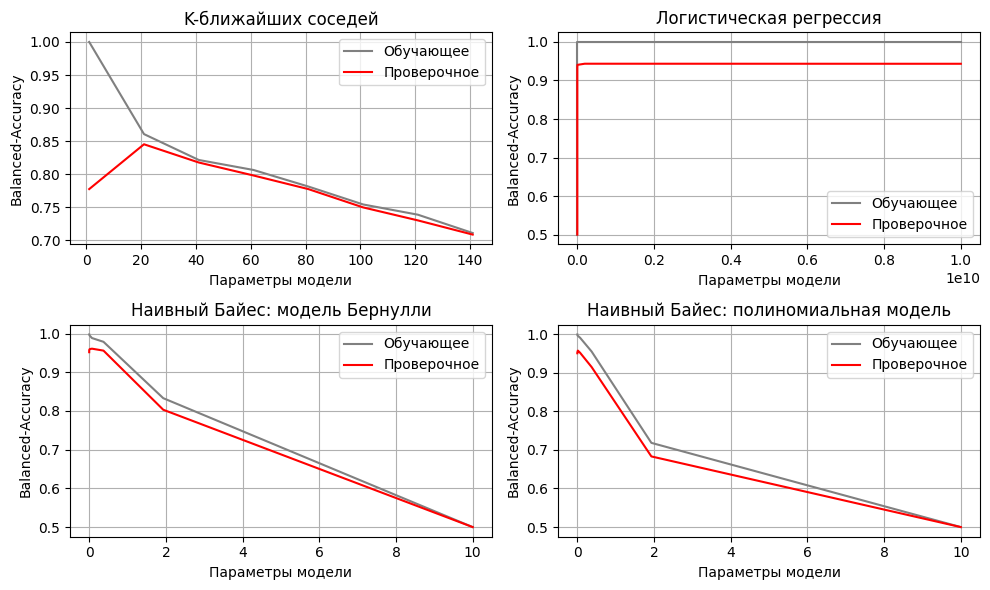

In [34]:
plt.figure("2",figsize=[10, 6])
plt.subplot(2,2,1)
plt.title("K-ближайших соседей") 
plt.plot(np.arange(1, 150, 20), output_knn['mean_train_score'], "-", color="grey", label="Обучающее") 
plt.plot(np.arange(1, 150, 20), output_knn['mean_test_score'], "-", color="red", label="Проверочное") 
plt.xlabel("Параметры модели")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Логистическая регрессия")
plt.plot(np.logspace(-2, 10, 8, base=10), output_logreg['mean_train_score'], "-", color="grey", label="Обучающее") 
plt.plot(np.logspace(-2, 10, 8, base=10), output_logreg['mean_test_score'], "-", color="red", label="Проверочное") 
plt.xlabel("Параметры модели")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)


plt.subplot(2,2,3)
plt.title("Наивный Байес: модель Бернулли") 
plt.plot(np.logspace(-4, 1, 8, base=10), output_bernNB['mean_train_score'], "-", color="grey", label="Обучающее") 
plt.plot(np.logspace(-4, 1, 8, base=10), output_bernNB['mean_test_score'], "-", color="red", label="Проверочное") 
plt.xlabel("Параметры модели")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)




plt.subplot(2,2,4)
plt.title("Наивный Байес: полиномиальная модель")
plt.plot(np.logspace(-4, 1, 8, base=10), output_multNB['mean_train_score'], "-", color="grey", label="Обучающее") 
plt.plot(np.logspace(-4, 1, 8, base=10), output_multNB['mean_test_score'], "-", color="red", label="Проверочное") 
plt.xlabel("Параметры модели")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout() 
plt.show()


4. Выберите лучшую модель для каждого метода, используя значение качества классификации (использовать Balanced-Accuracy)

In [35]:
knn_ = m_best_knn = m_knn_grid.best_estimator_
logreg_ = m_best_logreg = m_logreg_grid.best_estimator_
bernNB_ = m_best_bernNB = m_bernNB_grid.best_estimator_
multNB_ = m_best_multNB = m_multNB_grid.best_estimator_
model_params = []

print("Параметр лучшей модели K-ближайших соседей n:", m_best_knn.n_neighbors)
print("Параметр лучшей модели логистическая регрессия C:", m_best_logreg.C)
print("Параметр лучшей модели наивный Байес: модель Бернулли a:", m_best_bernNB.alpha)
print("Параметр лучшей модели наивный Байес: полиномиальная модель a:", m_best_multNB.alpha)
model_params.append(m_best_knn.n_neighbors)
model_params.append(m_best_logreg.C)
model_params.append(m_best_bernNB.alpha)
model_params.append(m_best_multNB.alpha)

Параметр лучшей модели K-ближайших соседей n: 21
Параметр лучшей модели логистическая регрессия C: 193069772.88832456
Параметр лучшей модели наивный Байес: модель Бернулли a: 0.07196856730011521
Параметр лучшей модели наивный Байес: полиномиальная модель a: 0.013894954943731374


5. Выбранные модели обучите на обучающем подмножестве (train) и протестируйте на тестовом (test). Определите время обучения и предсказания (см. задание 1 п. 6)

In [36]:
fit_time, pred_time = [], []
balanced_acc = []
recall = []
precision = []
f1 = []

start_t = time.time()
m_best_knn.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
knn_y = m_best_knn.predict(tfidf_test)
pred_time.append(time.time() - start_t)



start_t = time.time()
m_best_logreg.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
logreg_y = m_best_logreg.predict(tfidf_test)
pred_time.append(time.time() - start_t)



start_t = time.time()
m_best_bernNB.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
bernNB_y = m_best_bernNB.predict(tfidf_test)
pred_time.append(time.time() - start_t)


start_t = time.time()
m_best_multNB.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
multNB_y = m_best_multNB.predict(tfidf_test)
pred_time.append(time.time() - start_t)

balanced_acc.append(balanced_accuracy_score(y_test, knn_y))
balanced_acc.append(balanced_accuracy_score(y_test, logreg_y))
balanced_acc.append(balanced_accuracy_score(y_test, bernNB_y))
balanced_acc.append(balanced_accuracy_score(y_test, multNB_y))
    
recall.append(recall_score(y_test, knn_y, pos_label='spam'))
recall.append(recall_score(y_test, logreg_y, pos_label='spam'))
recall.append(recall_score(y_test, bernNB_y, pos_label='spam'))
recall.append(recall_score(y_test, multNB_y, pos_label='spam'))
    
precision.append(precision_score(y_test, knn_y, pos_label='spam'))
precision.append(precision_score(y_test, logreg_y, pos_label='spam'))
precision.append(precision_score(y_test, bernNB_y, pos_label='spam'))
precision.append(precision_score(y_test, multNB_y, pos_label='spam'))
    
f1.append(f1_score(y_test, knn_y, pos_label='spam'))
f1.append(f1_score(y_test, logreg_y, pos_label='spam'))
f1.append(f1_score(y_test, bernNB_y, pos_label='spam'))
f1.append(f1_score(y_test, multNB_y, pos_label='spam'))

6. Повторите шаги 2-5 для n-gram=2 и n-gram=(1,2)

Для n-gram=2

In [37]:
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(2,2)) 
vectorizer.fit(X_train)
tfidf_train = vectorizer.transform(X_train)
tfidf_test = vectorizer.transform(X_test)


# Гиперпараметры и их значения
params_knn = {"n_neighbors": np.arange(1, 150, 20)} # TODO: np.logspace  
params_logreg = {"C": np.logspace(-2, 10, 8, base=10)} # TODO: np.logspace  
params_NB = {"alpha": np.logspace(-4, 1, 8, base=10)} # TODO: np.logspace  

# Поиск лучшей модели
m_knn_grid = GridSearchCV(knn, params_knn, cv=kf, return_train_score=True, scoring='balanced_accuracy')
m_knn_grid.fit(tfidf_train, y_train)
# Поиск лучшей модели
m_logreg_grid = GridSearchCV(logreg, params_logreg, cv=kf, return_train_score=True, scoring='balanced_accuracy')
m_logreg_grid.fit(tfidf_train, y_train)
# Поиск лучшей модели
m_bernNB_grid = GridSearchCV(m_bernNB, params_NB, cv=kf, return_train_score=True, scoring='balanced_accuracy')
m_bernNB_grid.fit(tfidf_train, y_train)
# Поиск лучшей модели
m_multNB_grid = GridSearchCV(m_multNB, params_NB, cv=kf, return_train_score=True, scoring='balanced_accuracy')
m_multNB_grid.fit(tfidf_train, y_train)
print("balanced_accuracy knn=", m_knn_grid.score(tfidf_train, y_train))
print("balanced_accuracy logreg=", m_logreg_grid.score(tfidf_train, y_train))
print("balanced_accuracy bernNB=", m_bernNB_grid.score(tfidf_train, y_train))
print("balanced_accuracy multNB=", m_multNB_grid.score(tfidf_train, y_train))
results_knn = m_knn_grid.cv_results_
results_logreg = m_logreg_grid.cv_results_
results_bernNB = m_bernNB_grid.cv_results_
results_multNB = m_multNB_grid.cv_results_

output_knn = {'mean_train_score': [],'mean_test_score': []}
for i, params in enumerate(results_knn['params']):
    output_knn['mean_train_score'].append(results_knn['mean_train_score'][i])
    output_knn['mean_test_score'].append(results_knn['mean_test_score'][i])

output_logreg = {'mean_train_score': [],'mean_test_score': []}
for i, params in enumerate(results_logreg['params']):
    output_logreg['mean_train_score'].append(results_logreg['mean_train_score'][i])
    output_logreg['mean_test_score'].append(results_logreg['mean_test_score'][i])
    

output_bernNB = {'mean_train_score': [],'mean_test_score': []}
for i, params in enumerate(results_bernNB['params']):
    output_bernNB['mean_train_score'].append(results_bernNB['mean_train_score'][i])
    output_bernNB['mean_test_score'].append(results_bernNB['mean_test_score'][i])

output_multNB = {'mean_train_score': [],'mean_test_score': []}
for i, params in enumerate(results_multNB['params']):
    output_multNB['mean_train_score'].append(results_multNB['mean_train_score'][i])
    output_multNB['mean_test_score'].append(results_multNB['mean_test_score'][i])
    


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

balanced_accuracy knn= 0.9991071428571429
balanced_accuracy logreg= 0.9991071428571429
balanced_accuracy bernNB= 0.9982142857142857
balanced_accuracy multNB= 0.9991071428571429


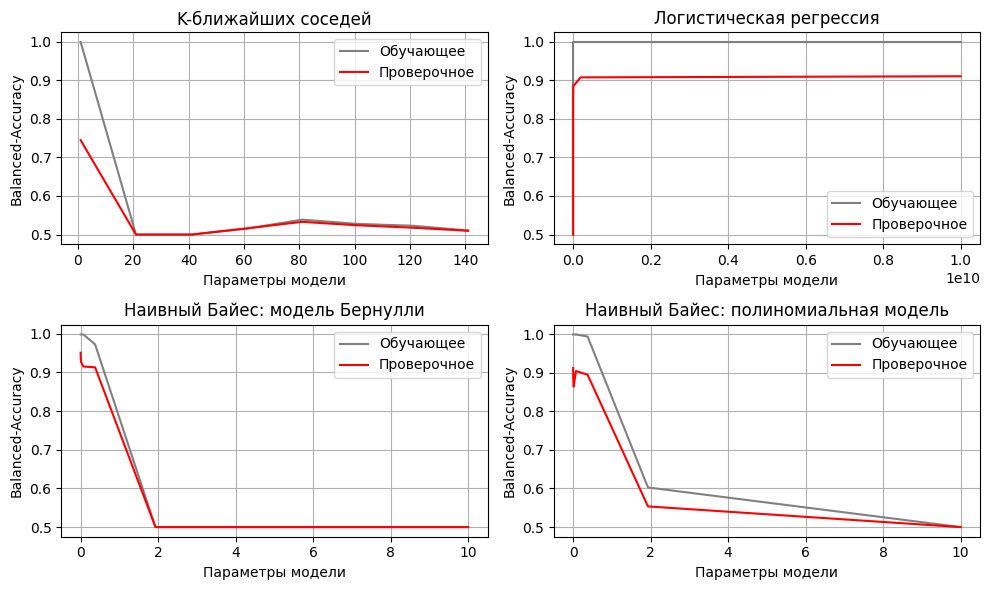

In [38]:
plt.figure("2",figsize=[10, 6])
plt.subplot(2,2,1)
plt.title("K-ближайших соседей") 
plt.plot(np.arange(1, 150, 20), output_knn['mean_train_score'], "-", color="grey", label="Обучающее") 
plt.plot(np.arange(1, 150, 20), output_knn['mean_test_score'], "-", color="red", label="Проверочное") 
plt.xlabel("Параметры модели")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Логистическая регрессия")
plt.plot(np.logspace(-2, 10, 8, base=10), output_logreg['mean_train_score'], "-", color="grey", label="Обучающее") 
plt.plot(np.logspace(-2, 10, 8, base=10), output_logreg['mean_test_score'], "-", color="red", label="Проверочное") 
plt.xlabel("Параметры модели")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)


plt.subplot(2,2,3)
plt.title("Наивный Байес: модель Бернулли") 
plt.plot(np.logspace(-4, 1, 8, base=10), output_bernNB['mean_train_score'], "-", color="grey", label="Обучающее") 
plt.plot(np.logspace(-4, 1, 8, base=10), output_bernNB['mean_test_score'], "-", color="red", label="Проверочное") 
plt.xlabel("Параметры модели")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)




plt.subplot(2,2,4)
plt.title("Наивный Байес: полиномиальная модель")
plt.plot(np.logspace(-4, 1, 8, base=10), output_multNB['mean_train_score'], "-", color="grey", label="Обучающее") 
plt.plot(np.logspace(-4, 1, 8, base=10), output_multNB['mean_test_score'], "-", color="red", label="Проверочное") 
plt.xlabel("Параметры модели")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout() 
plt.show()


In [39]:
m_best_knn = m_knn_grid.best_estimator_
m_best_logreg = m_logreg_grid.best_estimator_
m_best_bernNB = m_bernNB_grid.best_estimator_
m_best_multNB = m_multNB_grid.best_estimator_

print("Параметр лучшей модели K-ближайших соседей n:", m_best_knn.n_neighbors)
print("Параметр лучшей модели логистическая регрессия C:", m_best_logreg.C)
print("Параметр лучшей модели наивный Байес: модель Бернулли a:", m_best_bernNB.alpha)
print("Параметр лучшей модели наивный Байес: полиномиальная модель a:", m_best_multNB.alpha)
#model_params = [m_best_knn.n_neighbors,m_best_logreg.C,m_best_bernNB.alpha,m_best_multNB.alpha]

model_params.append(m_best_knn.n_neighbors)
model_params.append(m_best_logreg.C)
model_params.append(m_best_bernNB.alpha)
model_params.append(m_best_multNB.alpha)

start_t = time.time()
m_best_knn.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
knn_y = m_best_knn.predict(tfidf_test)
pred_time.append(time.time() - start_t)



start_t = time.time()
m_best_logreg.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
logreg_y = m_best_logreg.predict(tfidf_test)
pred_time.append(time.time() - start_t)



start_t = time.time()
m_best_bernNB.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
bernNB_y = m_best_bernNB.predict(tfidf_test)
pred_time.append(time.time() - start_t)


start_t = time.time()
m_best_multNB.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
multNB_y = m_best_multNB.predict(tfidf_test)
pred_time.append(time.time() - start_t)

balanced_acc.append(balanced_accuracy_score(y_test, knn_y))
balanced_acc.append(balanced_accuracy_score(y_test, logreg_y))
balanced_acc.append(balanced_accuracy_score(y_test, bernNB_y))
balanced_acc.append(balanced_accuracy_score(y_test, multNB_y))
    
recall.append(recall_score(y_test, knn_y, pos_label='spam'))
recall.append(recall_score(y_test, logreg_y, pos_label='spam'))
recall.append(recall_score(y_test, bernNB_y, pos_label='spam'))
recall.append(recall_score(y_test, multNB_y, pos_label='spam'))
    
precision.append(precision_score(y_test, knn_y, pos_label='spam'))
precision.append(precision_score(y_test, logreg_y, pos_label='spam'))
precision.append(precision_score(y_test, bernNB_y, pos_label='spam'))
precision.append(precision_score(y_test, multNB_y, pos_label='spam'))
    
f1.append(f1_score(y_test, knn_y, pos_label='spam'))
f1.append(f1_score(y_test, logreg_y, pos_label='spam'))
f1.append(f1_score(y_test, bernNB_y, pos_label='spam'))
f1.append(f1_score(y_test, multNB_y, pos_label='spam'))

Параметр лучшей модели K-ближайших соседей n: 1
Параметр лучшей модели логистическая регрессия C: 10000000000.0
Параметр лучшей модели наивный Байес: модель Бернулли a: 0.0001
Параметр лучшей модели наивный Байес: полиномиальная модель a: 0.0001


Для n-gram=(1,2)

In [40]:
vectorizer = TfidfVectorizer(lowercase=True, ngram_range=(1,2)) 
vectorizer.fit(X_train)
tfidf_train = vectorizer.transform(X_train)
tfidf_test = vectorizer.transform(X_test)


# Гиперпараметры и их значения
params_knn = {"n_neighbors": np.arange(1, 150, 20)} # TODO: np.logspace  
params_logreg = {"C": np.logspace(-2, 10, 8, base=10)} # TODO: np.logspace  
params_NB = {"alpha": np.logspace(-4, 1, 8, base=10)} # TODO: np.logspace  

# Поиск лучшей модели
m_knn_grid = GridSearchCV(knn, params_knn, cv=kf, return_train_score=True, scoring='balanced_accuracy')
m_knn_grid.fit(tfidf_train, y_train)
# Поиск лучшей модели
m_logreg_grid = GridSearchCV(logreg, params_logreg, cv=kf, return_train_score=True, scoring='balanced_accuracy')
m_logreg_grid.fit(tfidf_train, y_train)
# Поиск лучшей модели
m_bernNB_grid = GridSearchCV(m_bernNB, params_NB, cv=kf, return_train_score=True, scoring='balanced_accuracy')
m_bernNB_grid.fit(tfidf_train, y_train)
# Поиск лучшей модели
m_multNB_grid = GridSearchCV(m_multNB, params_NB, cv=kf, return_train_score=True, scoring='balanced_accuracy')
m_multNB_grid.fit(tfidf_train, y_train)
print("balanced_accuracy knn=", m_knn_grid.score(tfidf_train, y_train))
print("balanced_accuracy logreg=", m_logreg_grid.score(tfidf_train, y_train))
print("balanced_accuracy bernNB=", m_bernNB_grid.score(tfidf_train, y_train))
print("balanced_accuracy multNB=", m_multNB_grid.score(tfidf_train, y_train))
results_knn = m_knn_grid.cv_results_
results_logreg = m_logreg_grid.cv_results_
results_bernNB = m_bernNB_grid.cv_results_
results_multNB = m_multNB_grid.cv_results_

output_knn = {'mean_train_score': [],'mean_test_score': []}
for i, params in enumerate(results_knn['params']):
    output_knn['mean_train_score'].append(results_knn['mean_train_score'][i])
    output_knn['mean_test_score'].append(results_knn['mean_test_score'][i])

output_logreg = {'mean_train_score': [],'mean_test_score': []}
for i, params in enumerate(results_logreg['params']):
    output_logreg['mean_train_score'].append(results_logreg['mean_train_score'][i])
    output_logreg['mean_test_score'].append(results_logreg['mean_test_score'][i])
    

output_bernNB = {'mean_train_score': [],'mean_test_score': []}
for i, params in enumerate(results_bernNB['params']):
    output_bernNB['mean_train_score'].append(results_bernNB['mean_train_score'][i])
    output_bernNB['mean_test_score'].append(results_bernNB['mean_test_score'][i])

output_multNB = {'mean_train_score': [],'mean_test_score': []}
for i, params in enumerate(results_multNB['params']):
    output_multNB['mean_train_score'].append(results_multNB['mean_train_score'][i])
    output_multNB['mean_test_score'].append(results_multNB['mean_test_score'][i])
    


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


balanced_accuracy knn= 0.875340218292346
balanced_accuracy logreg= 1.0
balanced_accuracy bernNB= 0.9991071428571429
balanced_accuracy multNB= 0.9991071428571429


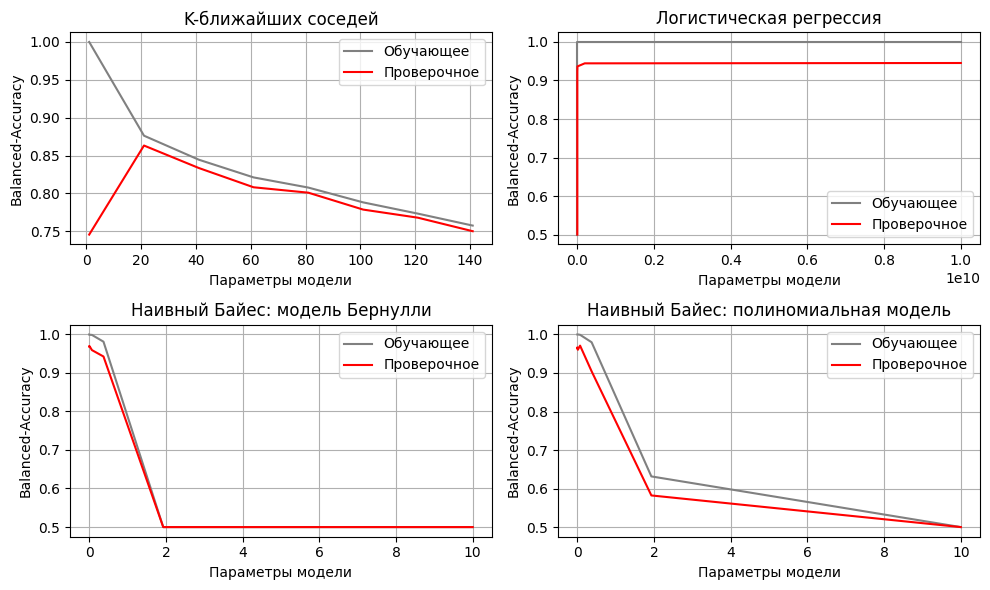

In [41]:
plt.figure("2",figsize=[10, 6])
plt.subplot(2,2,1)
plt.title("K-ближайших соседей") 
plt.plot(np.arange(1, 150, 20), output_knn['mean_train_score'], "-", color="grey", label="Обучающее") 
plt.plot(np.arange(1, 150, 20), output_knn['mean_test_score'], "-", color="red", label="Проверочное") 
plt.xlabel("Параметры модели")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Логистическая регрессия")
plt.plot(np.logspace(-2, 10, 8, base=10), output_logreg['mean_train_score'], "-", color="grey", label="Обучающее") 
plt.plot(np.logspace(-2, 10, 8, base=10), output_logreg['mean_test_score'], "-", color="red", label="Проверочное") 
plt.xlabel("Параметры модели")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)


plt.subplot(2,2,3)
plt.title("Наивный Байес: модель Бернулли") 
plt.plot(np.logspace(-4, 1, 8, base=10), output_bernNB['mean_train_score'], "-", color="grey", label="Обучающее") 
plt.plot(np.logspace(-4, 1, 8, base=10), output_bernNB['mean_test_score'], "-", color="red", label="Проверочное") 
plt.xlabel("Параметры модели")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)




plt.subplot(2,2,4)
plt.title("Наивный Байес: полиномиальная модель")
plt.plot(np.logspace(-4, 1, 8, base=10), output_multNB['mean_train_score'], "-", color="grey", label="Обучающее") 
plt.plot(np.logspace(-4, 1, 8, base=10), output_multNB['mean_test_score'], "-", color="red", label="Проверочное") 
plt.xlabel("Параметры модели")
plt.ylabel("Balanced-Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout() 
plt.show()


In [42]:
m_best_knn = m_knn_grid.best_estimator_
m_best_logreg = m_logreg_grid.best_estimator_
m_best_bernNB = m_bernNB_grid.best_estimator_
m_best_multNB = m_multNB_grid.best_estimator_

print("Параметр лучшей модели K-ближайших соседей n:", m_best_knn.n_neighbors)
print("Параметр лучшей модели логистическая регрессия C:", m_best_logreg.C)
print("Параметр лучшей модели наивный Байес: модель Бернулли a:", m_best_bernNB.alpha)
print("Параметр лучшей модели наивный Байес: полиномиальная модель a:", m_best_multNB.alpha)
#model_params = [m_best_knn.n_neighbors,m_best_logreg.C,m_best_bernNB.alpha,m_best_multNB.alpha]
model_params.append(m_best_knn.n_neighbors)
model_params.append(m_best_logreg.C)
model_params.append(m_best_bernNB.alpha)
model_params.append(m_best_multNB.alpha)


start_t = time.time()
m_best_knn.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
knn_y = m_best_knn.predict(tfidf_test)
pred_time.append(time.time() - start_t)



start_t = time.time()
m_best_logreg.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
logreg_y = m_best_logreg.predict(tfidf_test)
pred_time.append(time.time() - start_t)



start_t = time.time()
m_best_bernNB.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
bernNB_y = m_best_bernNB.predict(tfidf_test)
pred_time.append(time.time() - start_t)


start_t = time.time()
m_best_multNB.fit(tfidf_train, y_train)
fit_time.append(time.time() - start_t)
start_t = time.time()
multNB_y = m_best_multNB.predict(tfidf_test)
pred_time.append(time.time() - start_t)

balanced_acc.append(balanced_accuracy_score(y_test, knn_y))
balanced_acc.append(balanced_accuracy_score(y_test, logreg_y))
balanced_acc.append(balanced_accuracy_score(y_test, bernNB_y))
balanced_acc.append(balanced_accuracy_score(y_test, multNB_y))
    
recall.append(recall_score(y_test, knn_y, pos_label='spam'))
recall.append(recall_score(y_test, logreg_y, pos_label='spam'))
recall.append(recall_score(y_test, bernNB_y, pos_label='spam'))
recall.append(recall_score(y_test, multNB_y, pos_label='spam'))
    
precision.append(precision_score(y_test, knn_y, pos_label='spam'))
precision.append(precision_score(y_test, logreg_y, pos_label='spam'))
precision.append(precision_score(y_test, bernNB_y, pos_label='spam'))
precision.append(precision_score(y_test, multNB_y, pos_label='spam'))
    
f1.append(f1_score(y_test, knn_y, pos_label='spam'))
f1.append(f1_score(y_test, logreg_y, pos_label='spam'))
f1.append(f1_score(y_test, bernNB_y, pos_label='spam'))
f1.append(f1_score(y_test, multNB_y, pos_label='spam'))

Параметр лучшей модели K-ближайших соседей n: 21
Параметр лучшей модели логистическая регрессия C: 10000000000.0
Параметр лучшей модели наивный Байес: модель Бернулли a: 0.002682695795279727
Параметр лучшей модели наивный Байес: полиномиальная модель a: 0.07196856730011521


In [43]:
n_gram=['1','1','1','1','2','2','2','2', '(1-2)','(1-2)','(1-2)','(1-2)']
df = pd.DataFrame({'Classification model': ['KNN', 'LogisticRegression', 'BernoulliNB', 'MultinomialNB','KNN', 
                                            'LogisticRegression', 'BernoulliNB', 'MultinomialNB','KNN', 
                                            'LogisticRegression', 'BernoulliNB', 'MultinomialNB'], 
                   'n-gram': n_gram,'Значение параметра модели': model_params, 'Balanced Accuracy': balanced_acc, 
                   'Recall': recall, 'Precision': precision, 'F1': f1,'Fit time': fit_time, 'Predict time': pred_time})
df

,Classification model,n-gram,Значение параметра модели,Balanced Accuracy,Recall,Precision,F1,Fit time,Predict time
0,KNN,1,2.100000e+01,0.847179,0.695187,0.992366,0.817610,0.008689,1.024774
1,LogisticRegression,1,1.930698e+08,0.966442,0.941176,0.946237,0.943700,0.200458,0.000403
2,BernoulliNB,1,7.196857e-02,0.972847,0.946524,0.994382,0.969863,0.011740,0.001142
3,MultinomialNB,1,1.389495e-02,0.967914,0.935829,1.000000,0.966851,0.010063,0.000468
4,KNN,2,1.000000e+00,0.799465,0.598930,1.000000,0.749164,0.004705,0.452431
5,LogisticRegression,2,1.000000e+10,0.946271,0.957219,0.696498,0.806306,0.313094,0.000399
6,BernoulliNB,2,1.000000e-04,0.935000,0.871658,0.987879,0.926136,0.016681,0.002975
7,MultinomialNB,2,1.000000e-04,0.941134,0.893048,0.927778,0.910082,0.012275,0.000813
8,KNN,(1-2),2.100000e+01,0.868155,0.737968,0.985714,0.844037,0.007071,2.214474
9,LogisticRegression,(1-2),1.000000e+10,0.974464,0.957219,0.947090,0.952128,0.343419,0.000574


8. Сделайте выводы по полученным результатам (преимущества и недостатки методов)

**вывод:** 
- методы LogisticRegression, BernoulliNB и MultinomialNB с n-gram=1 и n-gram=(1,2) показывают лучшие результаты;
- Метод KNN показывает высокую точность, но при этом высокое время предсказания;
- Использование n-gram=2 показало ухудшение результатов для всех моделей.

### Задание 4. Оценка влияния количества признаков FeatureHasher на качество классификации (2 баллов)

Как будет меняться качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием.

Количество признаков: np.logspace(1, 5, 5, base=10)

In [44]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train_ = X_train.apply(lambda x: [x])  # Преобразовать каждый элемент в отдельный список строк
X_test_ = X_test.apply(lambda x: [x])  # Преобразовать каждый элемент в отдельный список строк

fit_time, pred_time = [], []
balanced_acc = []
recall = []
precision = []
f1 = []

for features in np.logspace(1, 5, 5, base=10).astype(int):
    vectorizer = HashingVectorizer(n_features=features, norm=None,  alternate_sign=False)
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)
    tfidf_transformer = TfidfTransformer()
    tfidf_transformer.fit(X_train_vectorized)
    tfidf_train_vectorizer = tfidf_transformer.fit_transform(X_train_vectorized)
    tfidf_test_vectorizer = tfidf_transformer.transform(X_test_vectorized)
    
    hasher = FeatureHasher(n_features=features, input_type='string', alternate_sign=False)
    X_train_hashed = hasher.fit_transform(X_train_)
    X_test_hashed = hasher.transform(X_test_)
    tfidf_transformer.fit(X_train_hashed)
    tfidf_train_hasher = tfidf_transformer.fit_transform(X_train_hashed)
    tfidf_test_hasher = tfidf_transformer.transform(X_test_hashed)

    
    #HashingVectorizer
    start_t = time.time()
    knn_.fit(tfidf_train_vectorizer, y_train)
    fit_time.append(time.time() - start_t)
    start_t = time.time()
    knn_y = knn_.predict(tfidf_test_vectorizer)
    pred_time.append(time.time() - start_t)

    start_t = time.time()
    logreg_.fit(tfidf_train_vectorizer, y_train)
    fit_time.append(time.time() - start_t)
    start_t = time.time()
    logreg_y = logreg_.predict(tfidf_test_vectorizer)
    pred_time.append(time.time() - start_t)

    start_t = time.time()
    bernNB_.fit(tfidf_train_vectorizer, y_train)
    fit_time.append(time.time() - start_t)
    start_t = time.time()
    bernNB_y = bernNB_.predict(tfidf_test_vectorizer)
    pred_time.append(time.time() - start_t)

    start_t = time.time()
    multNB_.fit(tfidf_train_vectorizer, y_train)
    fit_time.append(time.time() - start_t)
    start_t = time.time()
    multNB_y = multNB_.predict(tfidf_test_vectorizer)
    pred_time.append(time.time() - start_t)

    balanced_acc.append(balanced_accuracy_score(y_test, knn_y))
    balanced_acc.append(balanced_accuracy_score(y_test, logreg_y))
    balanced_acc.append(balanced_accuracy_score(y_test, bernNB_y))
    balanced_acc.append(balanced_accuracy_score(y_test, multNB_y))

    recall.append(recall_score(y_test, knn_y, pos_label='spam'))
    recall.append(recall_score(y_test, logreg_y, pos_label='spam'))
    recall.append(recall_score(y_test, bernNB_y, pos_label='spam'))
    recall.append(recall_score(y_test, multNB_y, pos_label='spam'))

    precision.append(precision_score(y_test, knn_y, pos_label='spam'))
    precision.append(precision_score(y_test, logreg_y, pos_label='spam'))
    precision.append(precision_score(y_test, bernNB_y, pos_label='spam'))
    precision.append(precision_score(y_test, multNB_y, pos_label='spam'))

    f1.append(f1_score(y_test, knn_y, pos_label='spam'))
    f1.append(f1_score(y_test, logreg_y, pos_label='spam'))
    f1.append(f1_score(y_test, bernNB_y, pos_label='spam'))
    f1.append(f1_score(y_test, multNB_y, pos_label='spam'))
    
    
    #FeatureHasher
    start_t = time.time()
    knn_.fit(tfidf_train_hasher, y_train)
    fit_time.append(time.time() - start_t)
    start_t = time.time()
    knn_y = knn_.predict(tfidf_test_hasher)
    pred_time.append(time.time() - start_t)

    start_t = time.time()
    logreg_.fit(tfidf_train_hasher, y_train)
    fit_time.append(time.time() - start_t)
    start_t = time.time()
    logreg_y = logreg_.predict(tfidf_test_hasher)
    pred_time.append(time.time() - start_t)

    start_t = time.time()
    bernNB_.fit(tfidf_train_hasher, y_train)
    fit_time.append(time.time() - start_t)
    start_t = time.time()
    bernNB_y = bernNB_.predict(tfidf_test_hasher)
    pred_time.append(time.time() - start_t)

    start_t = time.time()
    multNB_.fit(tfidf_train_hasher, y_train)
    fit_time.append(time.time() - start_t)
    start_t = time.time()
    multNB_y = multNB_.predict(tfidf_test_hasher)
    pred_time.append(time.time() - start_t)

    balanced_acc.append(balanced_accuracy_score(y_test, knn_y))
    balanced_acc.append(balanced_accuracy_score(y_test, logreg_y))
    balanced_acc.append(balanced_accuracy_score(y_test, bernNB_y))
    balanced_acc.append(balanced_accuracy_score(y_test, multNB_y))

    recall.append(recall_score(y_test, knn_y, pos_label='spam'))
    recall.append(recall_score(y_test, logreg_y, pos_label='spam'))
    recall.append(recall_score(y_test, bernNB_y, pos_label='spam'))
    recall.append(recall_score(y_test, multNB_y, pos_label='spam'))

    precision.append(precision_score(y_test, knn_y, pos_label='spam'))
    precision.append(precision_score(y_test, logreg_y, pos_label='spam'))
    precision.append(precision_score(y_test, bernNB_y, pos_label='spam'))
    precision.append(precision_score(y_test, multNB_y, pos_label='spam'))

    f1.append(f1_score(y_test, knn_y, pos_label='spam'))
    f1.append(f1_score(y_test, logreg_y, pos_label='spam'))
    f1.append(f1_score(y_test, bernNB_y, pos_label='spam'))
    f1.append(f1_score(y_test, multNB_y, pos_label='spam'))

/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [46]:
repeated_array = ['KNN', 'LogisticRegression', 'BernoulliNB', 'MultinomialNB']
repeated_array = repeated_array * 5
n_features = np.logspace(1, 5, 5, base=10).astype(int)
n_features = np.repeat(n_features, 4)

HashingVectorizer:

In [47]:
df = pd.DataFrame({'Classification model': repeated_array, 'n_features': n_features,
                   'Balanced Accuracy': balanced_acc[:20], 'Recall': recall[:20], 
                   'Precision': precision[:20], 'F1': f1[:20], 'Fit time': fit_time[:20], 
                   'Predict time': pred_time[:20]})
df

,Classification model,n_features,Balanced Accuracy,Recall,Precision,F1,Fit time,Predict time
0,KNN,10,0.606882,0.241830,0.578125,0.341014,0.003905,0.343003
1,LogisticRegression,10,0.565288,0.150327,0.547619,0.235897,0.027254,0.000305
2,BernoulliNB,10,0.663932,0.418301,0.423841,0.421053,0.014880,0.000738
3,MultinomialNB,10,0.500000,0.000000,0.000000,0.000000,0.014063,0.000290
4,KNN,100,0.500000,0.000000,0.000000,0.000000,0.003892,0.068513
5,LogisticRegression,100,0.500000,0.000000,0.000000,0.000000,0.016860,0.000323
6,BernoulliNB,100,0.500000,0.000000,0.000000,0.000000,0.013789,0.000507
7,MultinomialNB,100,0.500000,0.000000,0.000000,0.000000,0.014292,0.000274
8,KNN,1000,0.726679,0.457516,0.945946,0.616740,0.005446,0.845295
9,LogisticRegression,1000,0.844255,0.712418,0.825758,0.764912,0.052864,0.000406


FeatureHasher:

In [48]:
df = pd.DataFrame({'Classification model': repeated_array, 'n_features': n_features,
                   'Balanced Accuracy': balanced_acc[20:], 'Recall': recall[20:], 'Precision': precision[20:], 
                   'F1': f1[20:], 'Fit time': fit_time[20:], 'Predict time': pred_time[20:]})
df

,Classification model,n_features,Balanced Accuracy,Recall,Precision,F1,Fit time,Predict time
0,KNN,10,0.502748,0.006536,0.500000,0.012903,0.003885,0.070055
1,LogisticRegression,10,0.508843,0.045752,0.205882,0.074866,0.066616,0.000295
2,BernoulliNB,10,0.503346,0.032680,0.166667,0.054645,0.013984,0.000590
3,MultinomialNB,10,0.503346,0.032680,0.166667,0.054645,0.013533,0.000244
4,KNN,100,0.849153,0.699346,0.990741,0.819923,0.004220,0.720911
5,LogisticRegression,100,0.954918,0.915033,0.965517,0.939597,0.127603,0.000357
6,BernoulliNB,100,0.961973,0.928105,0.972603,0.949833,0.016872,0.001529
7,MultinomialNB,100,0.949571,0.908497,0.939189,0.923588,0.013144,0.000388
8,KNN,1000,0.500000,0.000000,0.000000,0.000000,0.004135,0.068922
9,LogisticRegression,1000,0.558902,0.143791,0.468085,0.220000,0.195159,0.000247


**Вывод:** качество классификации для обозначенных ранее методов при использовании FeatureHasher (или HashingVectorizer) из пакета sklearn перед TF-IDF преобразованием снижает качество классификаций. Время обучения и предсказания тоже уменьшается, что может быть полезно при большом наборе данных